In [1]:
import pandas as pd
import quandl

In [3]:
start = pd.to_datetime('2015-01-01')
end = pd.to_datetime('2018-03-09')

In [4]:
aapl = quandl.get('WIKI/AAPL.11', start_date = start, end_date = end)
amd = quandl.get('WIKI/AMD.11', start_date = start, end_date = end)
alphabet_clA = quandl.get('WIKI/GOOGL.11', start_date = start, end_date = end)
alphabet_clC = quandl.get('WIKI/GOOG.11', start_date = start, end_date = end)
amzn = quandl.get('WIKI/AMZN.11', start_date = start, end_date = end)
neon = quandl.get('WIKI/NEON.11', start_date = start, end_date = end)

In [5]:
neon.head()

,Adj. Close
Date,
2015-01-02,3.49
2015-01-05,3.33
2015-01-06,2.62
2015-01-07,2.94
2015-01-08,2.98


In [6]:
neon.iloc[0]['Adj. Close']

3.4900000000000002

In [7]:
for stock_df in (aapl, amzn, amd, neon, alphabet_clA, alphabet_clC):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [8]:
neon.head()

,Adj. Close,Normed Return
Date,,
2015-01-02,3.49,1.000000
2015-01-05,3.33,0.954155
2015-01-06,2.62,0.750716
2015-01-07,2.94,0.842407
2015-01-08,2.98,0.853868


In [9]:
neon.tail()

,Adj. Close,Normed Return
Date,,
2018-03-05,0.5151,0.147593
2018-03-06,0.4947,0.141748
2018-03-07,0.4900,0.140401
2018-03-08,0.4870,0.139542
2018-03-09,0.5000,0.143266


In [15]:
# list(zip((aapl, amzn, amd, alphabet_clA, alphabet_clA, neon),[.58,.28,.03,.05,.05,.01]))

In [10]:
# 58% im aapl
# 3% in amd
# 28% in amzn
# 5% in alphabet_clA
# 5% in alphabet_clC
# 1% in neon 

for stock_df , allo in zip((aapl, amzn, amd, alphabet_clA, alphabet_clC, neon),[.58,.28,.03,.05,.05,.01]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [12]:
neon.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2015-01-02,3.49,1.000000,0.010000
2015-01-05,3.33,0.954155,0.009542
2015-01-06,2.62,0.750716,0.007507
2015-01-07,2.94,0.842407,0.008424
2015-01-08,2.98,0.853868,0.008539


In [13]:
for stock_df in (aapl, amzn, amd, alphabet_clA, alphabet_clC, neon):
    stock_df['Position Values'] = stock_df['Allocation']*10000

In [14]:
neon.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2015-01-02,3.49,1.000000,0.010000,100.000000
2015-01-05,3.33,0.954155,0.009542,95.415473
2015-01-06,2.62,0.750716,0.007507,75.071633
2015-01-07,2.94,0.842407,0.008424,84.240688
2015-01-08,2.98,0.853868,0.008539,85.386819


In [15]:
all_pos_vals = [aapl['Position Values'], amd['Position Values'], neon['Position Values'], amzn['Position Values'],
               alphabet_clA['Position Values'], alphabet_clC['Position Values']]

In [16]:
portfolio_val = pd.concat(all_pos_vals, axis = 1)

In [17]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values,Position Values,Position Values
Date,,,,,,
2015-01-02,5800.000000,300.000000,100.000000,2800.000000,500.000000,500.000000
2015-01-05,5636.604775,296.654275,95.415473,2742.551536,490.473043,489.577180
2015-01-06,5637.135279,293.308550,75.071633,2679.929988,478.368426,478.230217
2015-01-07,5716.180371,287.732342,84.240688,2708.336575,476.961571,477.410873
2015-01-08,5935.809019,291.078067,85.386819,2726.850771,478.623359,478.916179


In [18]:
portfolio_val.columns = ['AAPL Pos','AMD Pos','NEON Pos','AMZN Pos', 'GOOGL Pos', 'GOOG Pos']

In [19]:
portfolio_val.head()

,AAPL Pos,AMD Pos,NEON Pos,AMZN Pos,GOOGL Pos,GOOG Pos
Date,,,,,,
2015-01-02,5800.000000,300.000000,100.000000,2800.000000,500.000000,500.000000
2015-01-05,5636.604775,296.654275,95.415473,2742.551536,490.473043,489.577180
2015-01-06,5637.135279,293.308550,75.071633,2679.929988,478.368426,478.230217
2015-01-07,5716.180371,287.732342,84.240688,2708.336575,476.961571,477.410873
2015-01-08,5935.809019,291.078067,85.386819,2726.850771,478.623359,478.916179


In [20]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [21]:
portfolio_val.head()

,AAPL Pos,AMD Pos,NEON Pos,AMZN Pos,GOOGL Pos,GOOG Pos,Total Pos
Date,,,,,,,
2015-01-02,5800.000000,300.000000,100.000000,2800.000000,500.000000,500.000000,10000.000000
2015-01-05,5636.604775,296.654275,95.415473,2742.551536,490.473043,489.577180,9751.276282
2015-01-06,5637.135279,293.308550,75.071633,2679.929988,478.368426,478.230217,9642.044093
2015-01-07,5716.180371,287.732342,84.240688,2708.336575,476.961571,477.410873,9750.862419
2015-01-08,5935.809019,291.078067,85.386819,2726.850771,478.623359,478.916179,9996.664215


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

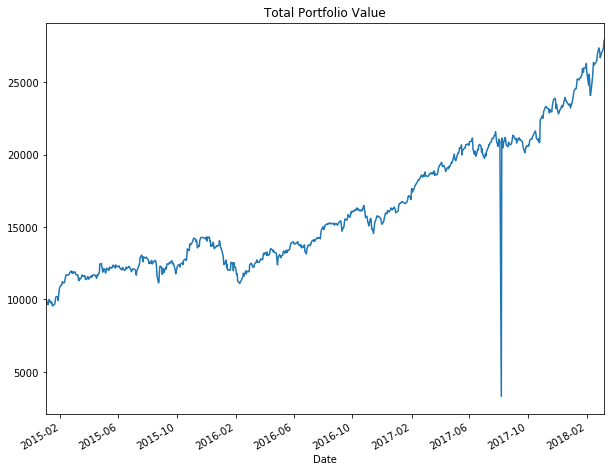

In [23]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

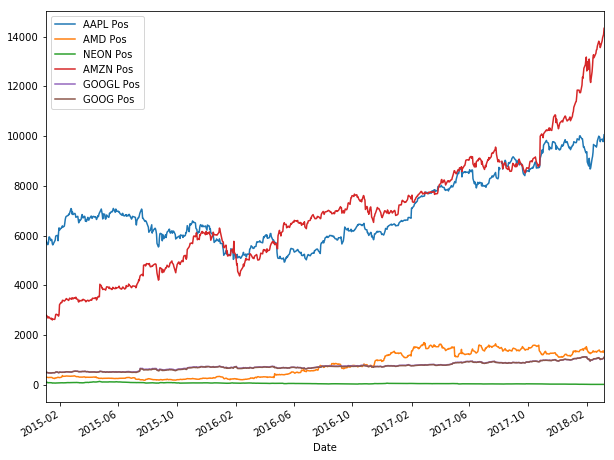

In [24]:
portfolio_val.drop('Total Pos', axis=1).plot(figsize=(10,8))

In [31]:
# Portfolio Stats
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Totoal Pos,Total Pos
Date,,,,,,
2012-01-03,300000.000000,200000.000000,100000.000000,400000.000000,1.000000e+06,2.000000e+06
2012-01-04,301612.236461,203864.734300,99592.055824,396603.921131,1.001673e+06,2.003346e+06
2012-01-05,304960.727573,203113.258186,99119.699410,396827.347372,1.004021e+06,2.008042e+06
2012-01-06,308148.724558,202361.782072,97981.749866,407998.659443,1.016491e+06,2.032982e+06
2012-01-09,307659.946988,203650.026838,97471.819646,398949.896665,1.007732e+06,2.015463e+06


In [25]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [26]:
# get the average daily return
portfolio_val['Daily Return'].mean()

0.007049526801436692

In [27]:
portfolio_val['Daily Return'].std()

0.19359077666109742

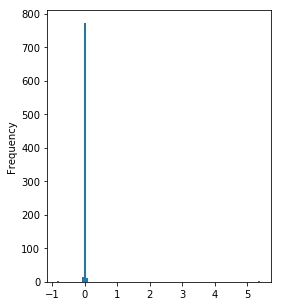

In [37]:
 portfolio_val['Daily Return'].plot(kind='hist', bins = 100, figsize = (4,5))

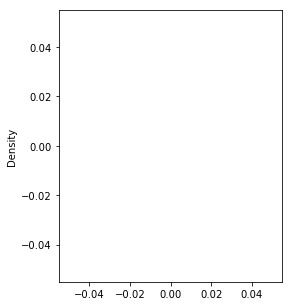

In [29]:
portfolio_val['Daily Return'].plot(kind='kde', figsize = (4,5))

In [30]:
cumulative_return = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0]-1)

In [31]:
cumulative_return

179.00268312320367

In [32]:
# Sharpe ratio
# portfolio return minus the risk-free rate divided by the standard deviation
# risk-free rate will be 0.0 for the moment
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()

In [33]:
SR

0.03641457988351215

In [34]:
# annualized - multiply by the square-root of 252 (business days in the year)
ASR = (252**0.5) * SR

In [35]:
ASR

0.5780635348120112